In [23]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Scikit-learn models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [16]:
# Load dataset
df = pd.read_csv('StudentsPerformance.csv')  # Replace with your actual file

# Preview data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# Check column types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
# Scale features (important for gradient boosting & linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name}")
    
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.2f}")



Linear Regression
R² Score: 0.880
Mean Squared Error: 29.10

Random Forest
R² Score: 0.849
Mean Squared Error: 36.70

Gradient Boosting
R² Score: 0.873
Mean Squared Error: 30.81


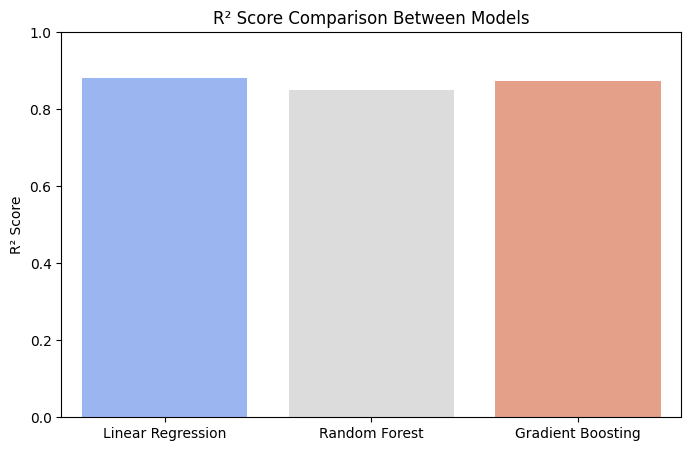

In [25]:
# Compare R² scores visually
results = {}

for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    results[name] = r2_score(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), hue=list(results.keys()), palette="coolwarm", legend=False)
plt.title("R² Score Comparison Between Models")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()
